In [114]:
using Pkg
Pkg.add("SymPy")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [115]:
using Plots
using SymPy

Si la pendiente de la curva es mayor a uno entonces este método no funciona.
Nos valdremos del teorema del valor medio para saber si aplicar este algoritmo o no.

$$f'(c) = \frac{f(b) - f(a)}{b -a}$$

## Condiciones necesarias:
1. Debemos garantizar que $f(x) \in [a, b]$ para todo $x \in [a, b]$.
2. Solo se converge si $|f'(x)| < 1$ para $x \in [a, b]$.

In [116]:
function f(x::Float64)::Float64
    return 4 - exp(x)  
end

function g(x::Float64)::Float64
    return log(4 - x)
end

function h(x::Float64)::Float64
    return x - (0.2*sen(x)) - 0.5
end

h (generic function with 1 method)

Ejemplo del fixed point iteration sobre una función que no cumple los requerimientos

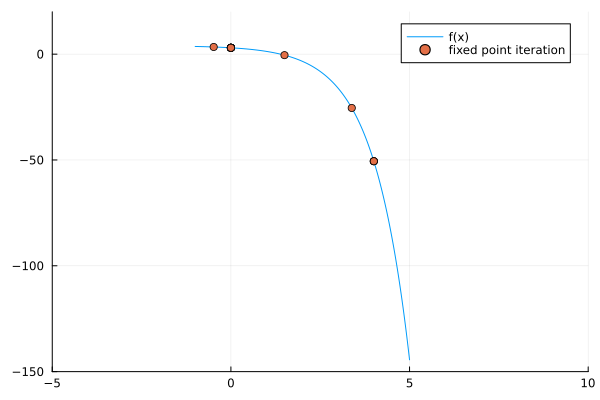

In [117]:
x = 1.5
valuesx = Array{Float64}(undef, 20)
valuesx[1] = x

for i in range(2, 10)
    x = f(x)
    valuesx[i] = x
end

y = f.(valuesx)

domain = range(-1,5, 400)
plot(domain, f.(domain), label="f(x)")
#scatter plot 
plot!(valuesx, y, seriestype=:scatter, label="fixed point iteration")
xlims!(-5,10)
ylims!(-150,20)

En este caso $g(x)$ si cumple los requerimientos, el algoritmo se ve:

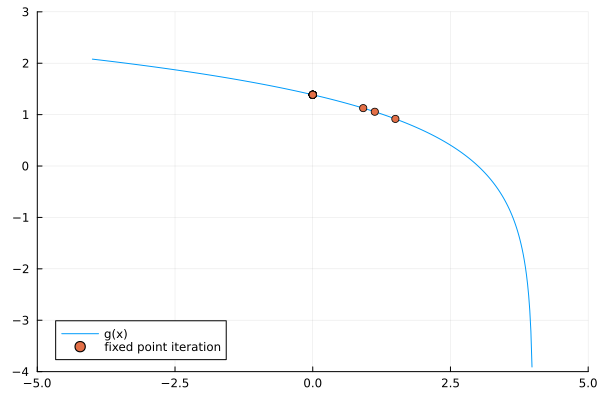

In [118]:

x = 1.5
valuesx = Array{Float64}(undef, 20)
valuesx[1] = x

for i in range(2, 3)
    x = g(x)
    valuesx[i] = x
end

y = g.(valuesx)
domain = range(-4, 4, 400)

plot(domain, g.(domain), label="g(x)")
#scatter plot 
plot!(valuesx, y, seriestype=:scatter, label="fixed point iteration")
xlims!(-5,5)
ylims!(-4,3)

Usamos el teorema del valor medio para revisar nuestras restricciones:
$$f'(c) = \frac{f(b) - f(a)}{b -a}$$


In [119]:
function check_constraints(f::Function, lower_bound::Float64, upper_bound::Float64)::Bool
   
    slope = abs( (f(upper_bound) - f(lower_bound))/(upper_bound-lower_bound) )

    if slope > 1
        return false
    else
        return true
    end
end

check_constraints (generic function with 1 method)

In [120]:
function fixed_point_iteration(f::Function,
                               x0::Float64,
                               lower_bound::Float64,
                               upper_bound::Float64,
                               tol::Float64,
                               maxiter::Int64)::Float64
    
    if  !check_constraints(f, lower_bound, upper_bound)
        error("The function does not meet the constraints")
    end

    x = x0

    for i in 1:maxiter
        x = f(x)

        if (x - tol) < lower_bound || (x + tol) > upper_bound
            error("The function diverges from the bounds.")

        elseif abs(f(x) - x) < tol
            println("The algorithm converged in $i iterations.")
            return x
        end
    end
    return x
    
end

fixed_point_iteration (generic function with 1 method)

Como se puede ver, la función $f(x)$ definida anteriormente no se puede calcular con este método, y nuestro código levanta un error para este caso precisamente.

In [121]:
x0 = 1.5
tol = 1e-8
maxiter = 100
lower_bound = -1.0
upper_bound = 2.0

fixed_point_iteration(f, x0, lower_bound, upper_bound, tol, maxiter)

ErrorException: The function does not meet the constraints

Para la función $g(x)$ esta si funciona adecuadamente:

In [126]:
x0 = 3.5
tol = 1e-8
maxiter = 100
lower_bound = -1.0
upper_bound = 2.0

xroot = fixed_point_iteration(g, x0, lower_bound, upper_bound, tol, maxiter)
print("xroot = ", xroot)

The algorithm converged in 19 iterations.
xroot = 1.0737289315982415

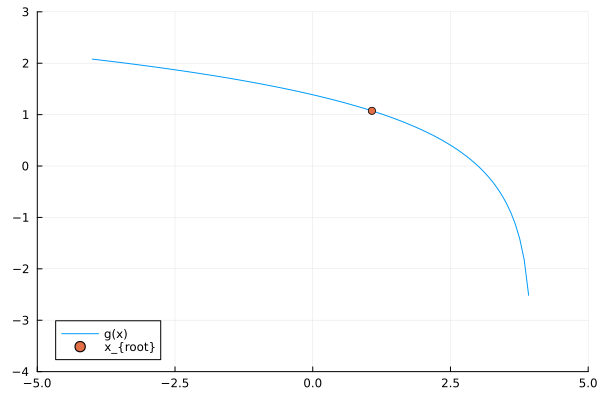

In [131]:
domain = range(-4, 4, 100)

plot(domain, g.(domain), label="g(x)")
scatter!([xroot], [g(xroot)], label="x_{root}")
xlims!(-5,5)
ylims!(-4,3)